# Final Project

# Data Preview

Data files include:<br>
- listings.csv (extracted information of listings)<br> 
- listings_detailed.csv (detailed information of listings)<br>
- neighbourhoods.csv (neighbourhoods in New York)<br>
- reviews.csv (summary review data and listing id)<br>
- reviews_detailed.csv (detailed review data include: listing id, date and comments)<br>
- calendar.csv (available dates and corresponding price of each listing)<br>

In [1]:
!wc -l "data/listings.csv"
! head -2 'data/listings.csv'

   50172 data/listings.csv
id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2515,Stay at Chez Chic budget room #1,2758,Steph,Manhattan,Harlem,40.79920479936168,-73.95367574543542,Private room,59,2,173,2018-09-18,1.42,3,310


In [2]:
!wc -l "data/listings_detailed.csv"
! head -2 'data/listings_detailed.csv'

   93674 data/listings_detailed.csv
id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,

In [3]:
! head -10 'data/neighbourhoods.csv'

neighbourhood_group,neighbourhood
Bronx,Allerton
Bronx,Baychester
Bronx,Belmont
Bronx,Bronxdale
Bronx,Castle Hill
Bronx,City Island
Bronx,Claremont Village
Bronx,Clason Point
Bronx,Concourse


In [4]:
! head -5 'data/reviews.csv'

listing_id,date
2515,2008-10-13
2515,2009-03-08
2515,2009-03-25
2515,2009-03-27


In [5]:
! head -2 'data/reviews_detailed.csv'

listing_id,id,date,reviewer_id,reviewer_name,comments
2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment was beautiful and extremely clean. We had a very nice (and affordable!) stay in the city with private room and own bathroom.


In [6]:
! head -5 'data/calendar.csv'

listing_id,date,available,price
16458,2019-08-06,f,
16338,2019-10-02,t,$55.00
16338,2019-10-01,t,$55.00
16338,2019-09-30,t,$55.00


# Preprocess

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
# import re
%matplotlib inline

In [2]:
listing = pd.read_csv('data/listings_detailed.csv')

/Users/carold/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 96 columns):
id                                  50041 non-null int64
listing_url                         50041 non-null object
scrape_id                           50041 non-null int64
last_scraped                        50041 non-null object
name                                50018 non-null object
summary                             48185 non-null object
space                               34379 non-null object
description                         49610 non-null object
experiences_offered                 50041 non-null object
neighborhood_overview               29820 non-null object
notes                               19906 non-null object
transit                             31091 non-null object
access                              28928 non-null object
interaction                         27811 non-null object
house_rules                         29879 non-null object
thumbnail_url          

In [4]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

remove features with too many NaN values

In [3]:
#missing values > 70%
df = listing[[column for column in listing if listing[column].count() / len(listing) >= 0.3]]
print("List of dropped columns:")
for c in listing.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')

##weekly_price, monthly_price ????

List of dropped columns:
thumbnail_url, medium_url, xl_picture_url, host_acceptance_rate, square_feet, weekly_price, monthly_price, license, jurisdiction_names, 



In [6]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181003014905,2018-10-03,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,https://www.airbnb.com/rooms/2539,20181003014905,2018-10-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.23
2,2595,https://www.airbnb.com/rooms/2595,20181003014905,2018-10-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,https://www.airbnb.com/rooms/3330,20181003014905,2018-10-03,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,https://www.airbnb.com/rooms/3647,20181003014905,2018-10-03,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN


#### Dropped columns:

['name','listing_url',  'scrape_id', 'last_scraped','experiences_offered'(all none),
'thumbnail_url', 'medium_url','picture_url'(no null),'host_url',
 'host_id', 'host_name','host_acceptance_rate'(no value),'host_thumbnail_url','host_picture_url',
 'street','neighbourhood', 'neighbourhood_cleansed','city', 'state', 'zipcode','smart_location','country_code', 'country', 'latitude', 'longitude',
 'square_feet','weekly_price', 'monthly_price','calendar_last_scraped',
 'requires_license'(all false?), 'license','jurisdiction_names',
 'host_neighbourhood','market']
 
------------
#### Numerical

['host_response_rate','host_listings_count','host_total_listings_count','accommodates','bathrooms', 'bedrooms', 'beds','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights', 'calendar_updated','availability_30', 'availability_60', 'availability_90',
       'availability_365','number_of_reviews',
       'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count','reviews_per_month']

------------
#### Categorical

['host_response_time','neighbourhood_group_cleansed',
    'property_type','room_type','bed_type','cancellation_policy']
    
t/f:[host_is_superhost,
host_has_profile_pic,
host_identity_verified,
is_location_exact,
has_availability,
instant_bookable,
is_business_travel_ready,
require_guest_profile_picture,
require_guest_phone_verification]

------------
#### Date

['host_since','first_review', 'last_review']



#### Text columns:

[ 'summary','space', 'description','neighborhood_overview','notes','transit','access','interaction','house_rules','host_about']

create dummy columns for text columns with missing value > 40%

In [4]:
text_cols = [ 'summary','space', 'description','neighborhood_overview','notes',
             'transit','access','interaction','house_rules','host_about']
print('missing value > 40%:')
text_dummy = listing[[column for column in text_cols if listing[column].count() / len(listing) <= 0.6]]
text_dummy.columns

missing value > 40%:


Index(['neighborhood_overview', 'notes', 'access', 'interaction',
       'house_rules'],
      dtype='object')

In [5]:
col_added = []
for col in text_dummy.columns:
    listing.loc[listing[col].isnull(),'has_'+str(col)] = 0
    listing['has_'+str(col)].fillna(1, inplace = True)
    col_added.append('has_'+str(col))
col_added

['has_neighborhood_overview',
 'has_notes',
 'has_access',
 'has_interaction',
 'has_house_rules']

In [6]:
 selected_columns = ['id', 
                     'host_since', 'host_location',
                       'host_response_time', 'host_response_rate',
                        'host_is_superhost', 'host_listings_count',
                       'host_total_listings_count', 'host_verifications',
                       'host_has_profile_pic', 'host_identity_verified', 
                       'neighbourhood_group_cleansed', 
                       'is_location_exact', 'property_type', 'room_type', 'accommodates',
                       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
                       'price', 'security_deposit',
                       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                       'maximum_nights', 'calendar_updated', 'has_availability',
                       'availability_30', 'availability_60', 'availability_90',
                       'availability_365', 'number_of_reviews',
                       'first_review', 'last_review', 'review_scores_rating',
                       'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication',
                       'review_scores_location', 'review_scores_value',  'instant_bookable',
                       'is_business_travel_ready', 'cancellation_policy',
                       'require_guest_profile_picture', 'require_guest_phone_verification',
                       'calculated_host_listings_count', 'reviews_per_month',
                        'has_neighborhood_overview','has_notes','has_access', 'has_interaction', 'has_house_rules']
listing = listing[selected_columns]

In [7]:
listing[['review_scores_rating','review_scores_accuracy',
          'review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location',
          'review_scores_value']].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,38445.000000,38393.000000,38414.000000,38365.000000,38400.000000,38359.000000,38360.000000
mean,93.726648,9.589482,9.252877,9.731239,9.746536,9.496311,9.378467
std,8.448151,0.839154,1.082656,0.718694,0.711815,0.793227,0.898531
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


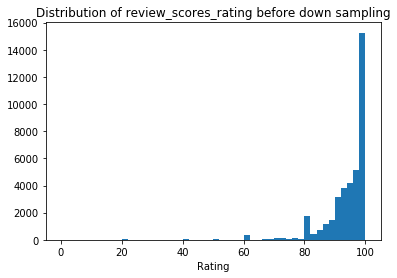

In [11]:
plt.hist(listing['review_scores_rating'].dropna(),bins=50,range=(0,100))
plt.title('Distribution of review_scores_rating before down sampling')
plt.xlabel('Rating')
plt.show()

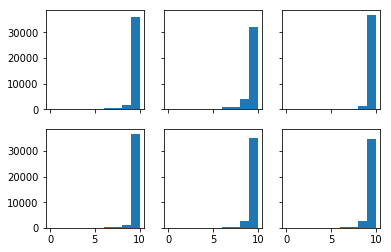

In [12]:
fig,axes = plt.subplots(2,3,sharex=True, sharey=True)
axes[0,0].hist(df['review_scores_accuracy'].dropna(),bins=10,range=(0,10))
axes[0,1].hist(df['review_scores_cleanliness'].dropna(),bins=10,range=(0,10))
axes[0,2].hist(df['review_scores_checkin'].dropna(),bins=10,range=(0,10))
axes[1,0].hist(df['review_scores_communication'].dropna(),bins=10,range=(0,10))
axes[1,1].hist(df['review_scores_location'].dropna(),bins=10,range=(0,10))
axes[1,2].hist(df['review_scores_value'].dropna(),bins=10,range=(0,10))
plt.show()

In [13]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 56 columns):
id                                  50041 non-null int64
host_since                          50032 non-null object
host_location                       49884 non-null object
host_response_time                  24089 non-null object
host_response_rate                  24086 non-null object
host_is_superhost                   50032 non-null object
host_listings_count                 50032 non-null float64
host_total_listings_count           50032 non-null float64
host_verifications                  50041 non-null object
host_has_profile_pic                50032 non-null object
host_identity_verified              50032 non-null object
neighbourhood_group_cleansed        50041 non-null object
is_location_exact                   50041 non-null object
property_type                       50041 non-null object
room_type                           50041 non-null object
accommodates        

# Preprocessing

####  host_since --> host_since_elapsed
transform date to days elapsed from that date until today

In [14]:
today = pd.datetime.today()
listing['host_since'] = pd.to_datetime(listing['host_since'])
listing['host_since_elapsed'] = (today - listing['host_since']).dt.days

In [15]:
listing['host_since_elapsed'].isnull().sum()

9

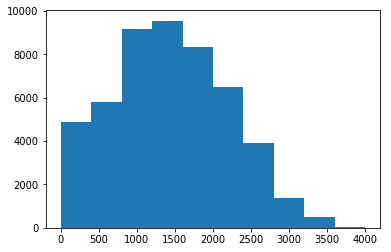

In [16]:
plt.hist(listing['host_since_elapsed'].dropna(),bins=10,range=(0,4000))
plt.show()

In [17]:
listing.drop('host_since',1,inplace=True)

####  host_location --> host_location_if_local
if host location is in new york, set it to be 1, otherwise 0

In [18]:
listing.loc[listing['host_location'] == 'New York, New York, United States','host_location_if_local'] = 1
listing.loc[listing['host_location'] != 'New York, New York, United States','host_location_if_local'] = 0
listing.loc[listing['host_location'].isnull(), 'host_location_if_local'] = np.NaN

In [19]:
listing.drop('host_location',1,inplace=True)

#### host_response_rate
50% --> 0.5

In [20]:
listing['host_response_rate'] = listing['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [21]:
listing['host_response_rate'].isnull().sum()

25955

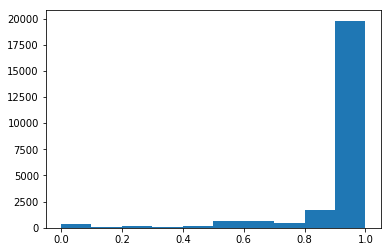

In [22]:
plt.hist(listing['host_response_rate'].dropna(),bins=10,range=(0,1))
plt.show()

In [23]:
# listing['logit_host_response_rate'] = np.log(listing['host_response_rate']/(1-listing['host_response_rate']))

In [24]:
# plt.hist(listing['logit_host_response_rate'].dropna(),bins=10,range=(-5,9))
# plt.show()

In [25]:
# listing.drop('host_response_rate',1,inplace=True)

#### host_verifications
split to host_verifications_phone, host_verifications_sasame,...

In [26]:
listing['host_verifications'][0].strip('[]').replace('\'','').replace(' ','').split(',')

['email',
 'phone',
 'facebook',
 'reviews',
 'jumio',
 'offline_government_id',
 'government_id']

In [27]:
listing['host_verifications'] = listing['host_verifications'].apply(lambda item : str(item).strip('[]').replace('\'','').replace(' ','').split(','))
listing['host_verifications'][2]
##nan?

['email', 'phone', 'reviews', 'kba', 'work_email']

In [28]:
verifications = []
for item in listing['host_verifications']:
    verifications += item
verifications = list(filter(None,set(verifications)))
verifications

['google',
 'facebook',
 'weibo',
 'offline_government_id',
 'manual_offline',
 'jumio',
 'zhima_selfie',
 'kba',
 'sesame',
 'email',
 'work_email',
 'None',
 'phone',
 'reviews',
 'selfie',
 'sesame_offline',
 'photographer',
 'government_id',
 'identity_manual',
 'manual_online',
 'sent_id']

In [29]:
for verif in verifications:
    listing.loc[listing['host_verifications'].map(lambda x: verif in x),'host_verifications_'+str(verif)] = 1
    listing['host_verifications_'+str(verif)].fillna(0,inplace=True)

In [30]:
listing['host_verifications_weibo'].unique()

array([0., 1.])

In [31]:
listing.drop('host_verifications',1,inplace=True)

#### amenities
split to amenities_TV, amenities_Cable_TV ...

In [32]:
listing['amenities'][0]

'{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Free street parking","Buzzer/wireless intercom",Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Children’s books and toys","Window guards","Pack ’n Play/travel crib","Hot water",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Host greets you"}'

In [33]:
#convert to list
listing['amenities'] = listing['amenities'].apply(lambda item : item.strip('{}').replace('\"','').split(','))

In [34]:
amenities = []
for item in listing['amenities']:
    amenities += item
amenities = list(filter(None,set(amenities)))
amenities

['Carbon monoxide detector',
 'Pets allowed',
 'Hair dryer',
 'Cat(s)',
 'Host greets you',
 'Children’s books and toys',
 'Lockbox',
 'High chair',
 'Outlet covers',
 'Bed linens',
 'Baby bath',
 'Dryer',
 'Changing table',
 'Long term stays allowed',
 'Dog(s)',
 'Wide hallway clearance',
 'Cleaning before checkout',
 'Family/kid friendly',
 'Beachfront',
 'Bathtub',
 'Shampoo',
 'Microwave',
 'Smoke detector',
 'Bathtub with bath chair',
 'TV',
 'Well-lit path to entrance',
 'Lock on bedroom door',
 'Patio or balcony',
 'Coffee maker',
 'Wifi',
 'Stair gates',
 'Other pet(s)',
 'EV charger',
 'Self check-in',
 'Washer / Dryer',
 'Private living room',
 'Breakfast',
 'Elevator',
 'Fire extinguisher',
 'Luggage dropoff allowed',
 'Waterfront',
 'Gym',
 'First aid kit',
 'Pool',
 'Suitable for events',
 'Pocket wifi',
 'Kitchen',
 'translation missing: en.hosting_amenity_49',
 '24-hour check-in',
 'Air conditioning',
 'Pets live on this property',
 'Dishwasher',
 'Beach essentials',
 'W

In [35]:
for amen in amenities:
    col = 'amenities_'+str(amen).replace(' ','_')
    listing.loc[listing['amenities'].map(lambda x: amen in x),col] = 1
    listing[col].fillna(0,inplace=True)
listing['amenities_TV'].unique()

array([1., 0.])

In [36]:
listing.drop('amenities',1,inplace=True)

### Money sign
- price
- security_deposit
- cleaning_fee
- extra_people

In [37]:
for col in ['price','security_deposit','cleaning_fee','extra_people']:
    listing[col]= listing[col].apply(lambda x: float(str(x).replace(',','').replace('$','')))

#### calendar_updated

In [38]:
listing['calendar_updated'].unique()

array(['today', 'a week ago', '25 months ago', '2 days ago',
       '9 months ago', '3 months ago', '3 weeks ago', '14 months ago',
       '7 weeks ago', '3 days ago', '7 months ago', '6 weeks ago',
       '2 months ago', 'yesterday', '2 weeks ago', '8 months ago',
       '4 months ago', '4 weeks ago', '5 weeks ago', '72 months ago',
       '5 months ago', '6 days ago', '4 days ago', '16 months ago',
       '18 months ago', '6 months ago', '32 months ago', '27 months ago',
       '1 week ago', '39 months ago', '13 months ago', '5 days ago',
       '17 months ago', '26 months ago', '11 months ago', '22 months ago',
       '28 months ago', 'never', '24 months ago', '33 months ago',
       '15 months ago', '68 months ago', '36 months ago', '19 months ago',
       '35 months ago', '10 months ago', '23 months ago', '41 months ago',
       '12 months ago', '81 months ago', '37 months ago', '40 months ago',
       '38 months ago', '34 months ago', '42 months ago', '50 months ago',
       '45 

In [39]:
#months
listing.loc[listing['calendar_updated'].str.contains('months'),'calendar_updated'] = listing.loc[listing['calendar_updated'].str.contains('months'),'calendar_updated'].apply(lambda x: float(x.split(' ')[0])*30)

In [40]:
#weeks
listing.loc[listing['calendar_updated']=='a week ago','calendar_updated'] = 7
listing.loc[listing['calendar_updated']=='1 week ago','calendar_updated'] = 7
listing.loc[listing['calendar_updated'].str.contains('weeks',na=False),'calendar_updated'] = listing.loc[listing['calendar_updated'].str.contains('weeks',na=False),'calendar_updated'].apply(lambda x: float(x.split(' ')[0])*7)

In [41]:
#days
listing.loc[listing['calendar_updated']=='yesterday','calendar_updated'] = 1
listing.loc[listing['calendar_updated']=='today','calendar_updated'] = 0
listing.loc[listing['calendar_updated'].str.contains('days',na=False),'calendar_updated'] = listing.loc[listing['calendar_updated'].str.contains('weeks',na=False),'calendar_updated'].apply(lambda x: float(x.split(' ')[0]))

In [42]:
#never
listing.loc[listing['calendar_updated']=='never','calendar_updated'] = -1

In [43]:
listing['calendar_updated'] = listing['calendar_updated'].astype('float64')
listing['calendar_updated'].isnull().sum()

4555

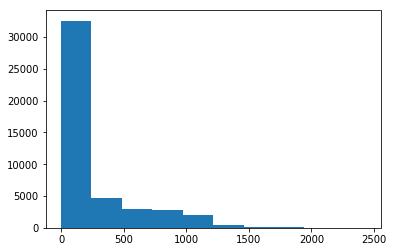

In [62]:
plt.hist(listing['calendar_updated'].dropna(),bins=10,
         range=(-1,max(listing['calendar_updated'])))
plt.show()

#### first_review, last_review

In [45]:
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])

### Dummy features: 
't', 'f', (nan)
- host_is_superhost
- host_has_profile_pic
- host_identity_verified
- is_location_exact
- has_availability
- instant_bookable
- is_business_travel_ready
- require_guest_profile_picture
- require_guest_phone_verification

In [46]:
listing['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [47]:
dummy_cols = ['host_is_superhost','host_has_profile_pic',
              'host_identity_verified','is_location_exact',
              'has_availability','instant_bookable','is_business_travel_ready',
              'require_guest_profile_picture','require_guest_phone_verification']
for col in dummy_cols:
    listing.loc[listing[col] == 't',col] = '1'
    listing.loc[listing[col] == 'f',col] = '0'
    listing[col] = pd.to_numeric(listing[col])

### Categorical features:
- host_response_time
- neighbourhood_group_cleansed
- market
- property_type
- room_type
- bed_type
- cancellation_policy

In [48]:
#Catogorical data values
cat_cols = ['host_response_time','neighbourhood_group_cleansed',
            'property_type','room_type','bed_type','cancellation_policy']
for col in cat_cols:
    print(col+str(': ') ,listing[col].unique())

host_response_time:  [nan 'within a day' 'within an hour' 'within a few hours'
 'a few days or more']
neighbourhood_group_cleansed:  ['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
property_type:  ['Apartment' 'Guest suite' 'House' 'Condominium' 'Loft' 'Townhouse'
 'Bed and breakfast' 'Boutique hotel' 'Tiny house' 'Guesthouse'
 'Serviced apartment' 'Other' 'Resort' 'Boat' 'Hotel' 'Aparthotel'
 'Bungalow' 'Hostel' 'Cottage' 'Tent' 'Villa' 'Cave' 'Nature lodge'
 'Houseboat' 'Cabin' 'Castle' 'Train' 'Timeshare' 'Camper/RV'
 'Casa particular (Cuba)']
room_type:  ['Private room' 'Entire home/apt' 'Shared room']
bed_type:  ['Real Bed' 'Pull-out Sofa' 'Futon' 'Couch' 'Airbed']
cancellation_policy:  ['strict_14_with_grace_period' 'moderate' 'flexible' 'super_strict_30'
 'strict' 'long_term' 'super_strict_60']


In [49]:
listing.loc[listing['host_response_time'] == 'within an hour','host_response_time'] = '0'
listing.loc[listing['host_response_time'] == 'within a few hours','host_response_time'] = '1'
listing.loc[listing['host_response_time'] == 'within a day','host_response_time'] = '2'
listing.loc[listing['host_response_time'] == 'a few days or more','host_response_time'] = '3'
listing['host_response_time'] = pd.to_numeric(listing['host_response_time'])

In [50]:
cat_cols = ['neighbourhood_group_cleansed',
            'property_type','room_type','bed_type','cancellation_policy']
dummies = pd.get_dummies(listing[cat_cols])
pd.concat([listing,dummies],axis = 1)
listing.drop(cat_cols,1,inplace=True)

In [53]:
listing.select_dtypes(include='float64').columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'bathrooms',
       'bedrooms', 'beds',
       ...
       'amenities_BBQ_grill', 'amenities_Hot_tub', 'amenities_Firm_mattress',
       'amenities_Babysitter_recommendations', 'amenities_Ski-in/Ski-out',
       'amenities_Fixed_grab_bars_for_toilet', 'amenities_Single_level_home',
       'amenities_translation_missing:_en.hosting_amenity_50',
       'amenities_Window_guards', 'amenities_Disabled_parking_spot'],
      dtype='object', length=176)

In [56]:
len(listing.select_dtypes(include='float64').columns)

176

In [54]:
listing.select_dtypes(include='datetime').columns

Index(['first_review', 'last_review'], dtype='object')

In [55]:
len(listing.select_dtypes(include='datetime').columns)

2

In [58]:
listing.select_dtypes(include='int').columns

Index(['id', 'is_location_exact', 'accommodates', 'guests_included',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'instant_bookable',
       'is_business_travel_ready', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count'],
      dtype='object')

In [60]:
len(listing.select_dtypes(include='int').columns)

17

In [57]:
len(listing.columns)

195

In [61]:
listing.to_csv('listings_processed.csv', sep='\t')

# TO DO:
- process missing values
- look at data distribution and check if transformation is needed
- feature correlations
- PCA to reduce dimension
- baseline model(Logit)

*host_response_time, host_response_rate which to drop